In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
cwd = os.getcwd()

NOTEBOOK_DIR = os.path.dirname(cwd)
ROOT = os.path.dirname(os.path.dirname(os.path.dirname(NOTEBOOK_DIR)))

FIGURES_DIR = os.path.join(ROOT, 'figures/abc_parameterizations/vanishing_ip')

In [3]:
import sys
sys.path.append(ROOT)

In [4]:
import torch
import pickle
from utils.tools import load_pickle

from utils.tools import read_yaml, set_random_seeds
from utils.plot.abc_parameterizations.initializations import *
from pytorch.configs.model import ModelConfig
from pytorch.models.abc_params.fully_connected import ntk, ip, muP
from utils.plot.abc_parameterizations.results import *

## Define variables and load results

In [5]:
Ls= [2, 3, 4, 5]
WIDTHS = [128, 256, 512, 1024, 1400]
N_TRIALS = 5

exp_dir = os.path.join(ROOT, 'experiments')
base_exp = 'standard_fc_ip_mnist'
lr=0.001
batch_size = 128
bias = False

In [6]:
results_dict = {'gelu': dict(), 'relu': dict()}
for activation in results_dict.keys():
    results_dict[activation] = get_trial_results(Ls, WIDTHS, N_TRIALS, exp_dir, base_exp, activation, lr, batch_size,
                                                 bias)

In [7]:
epoch_res_dict = dict()
step_res_dict = dict()
for activation in results_dict.keys():
    epoch_res, step_res = get_epoch_step_results_from_trials(results_dict[activation], 
                                                             pop_keys=('lrs', 'all_losses'))
    epoch_res_dict[activation] = epoch_res
    step_res_dict[activation] = step_res

## 1. GeLU

In [8]:
activation = 'gelu'
metric = 'loss'

### Training

In [9]:
mode='training'

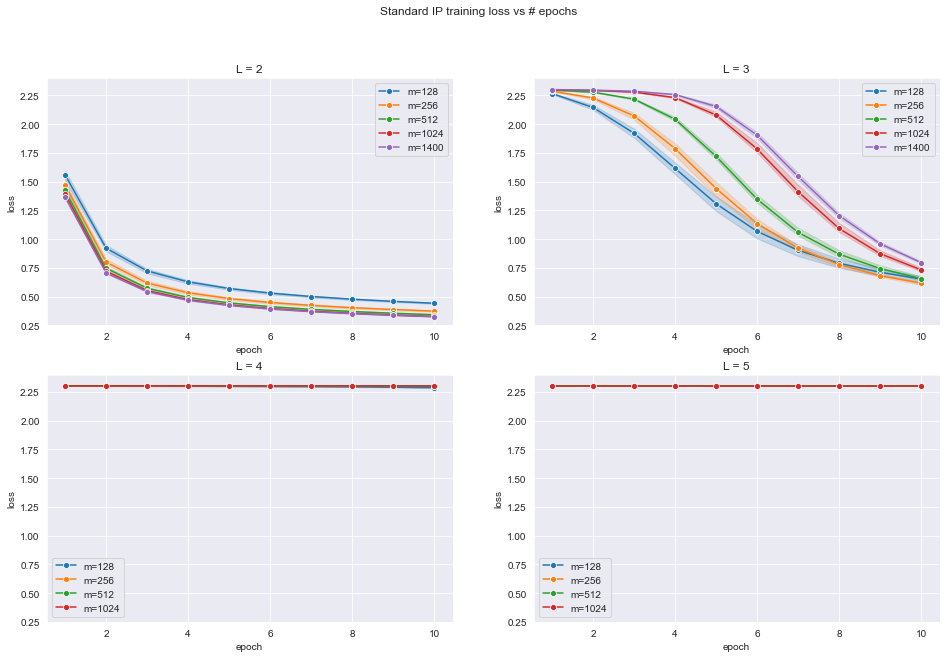

In [10]:
fig_name = 'standard_ip_{}_{}_{}.png'.format(activation, mode, metric)
fig_path = os.path.join(FIGURES_DIR, fig_name)
plot_metric_vs_time_std_L(fig_path=fig_path, results=epoch_res_dict[activation], metric=metric, time='epoch',
                          mode=mode, marker='o', y_min=0.25, y_max=2.4, figsize=(16,10))

### Validation

In [11]:
mode='validation'

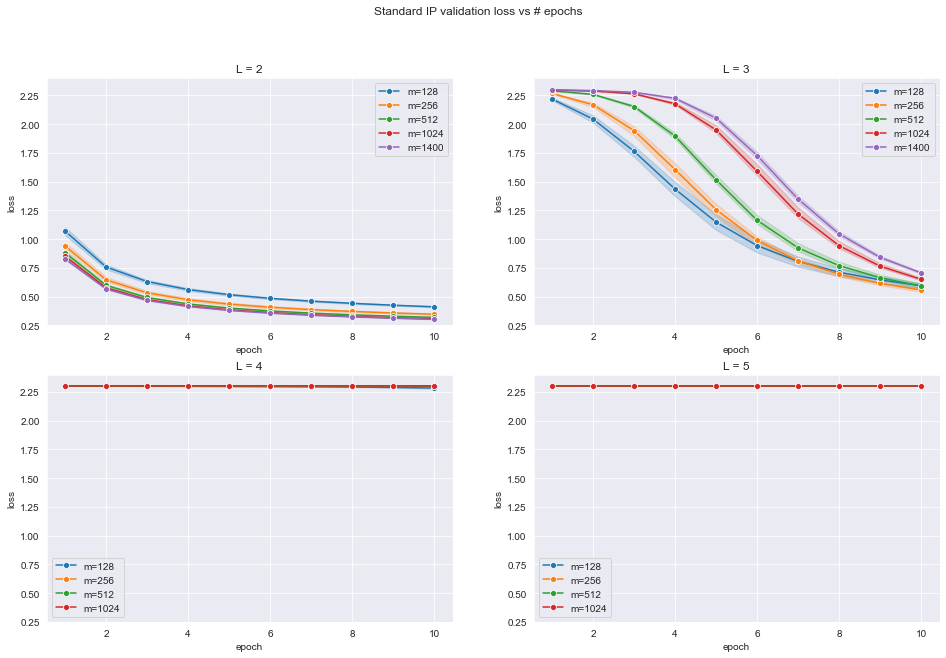

In [12]:
fig_name = 'standard_ip_{}_{}_{}.png'.format(activation, mode, metric)
fig_path = os.path.join(FIGURES_DIR, fig_name)
plot_metric_vs_time_std_L(fig_path=fig_path, results=epoch_res_dict[activation], metric=metric, time='epoch',
                          mode=mode, marker='o', y_min=0.25, y_max=2.4, figsize=(16,10))

## 2. ReLU

In [13]:
activation = 'relu'
metric = 'loss'

### Training

In [14]:
mode='training'

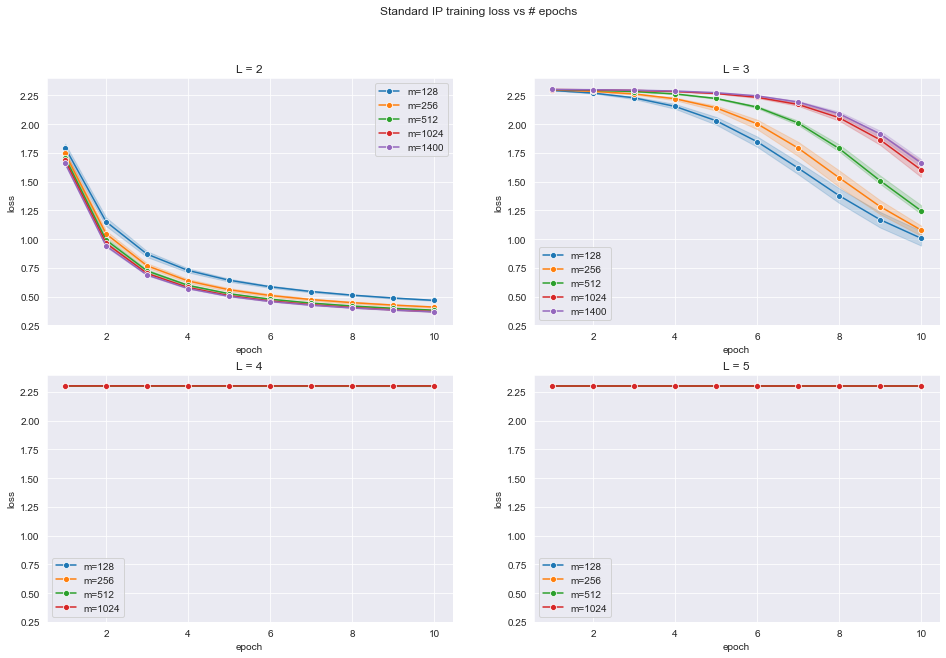

In [15]:
fig_name = 'standard_ip_{}_{}_{}.png'.format(activation, mode, metric)
fig_path = os.path.join(FIGURES_DIR, fig_name)
plot_metric_vs_time_std_L(fig_path=fig_path, results=epoch_res_dict[activation], metric=metric, time='epoch',
                          mode=mode, marker='o', y_min=0.25, y_max=2.4, figsize=(16,10))

### Validation

In [16]:
mode='validation'

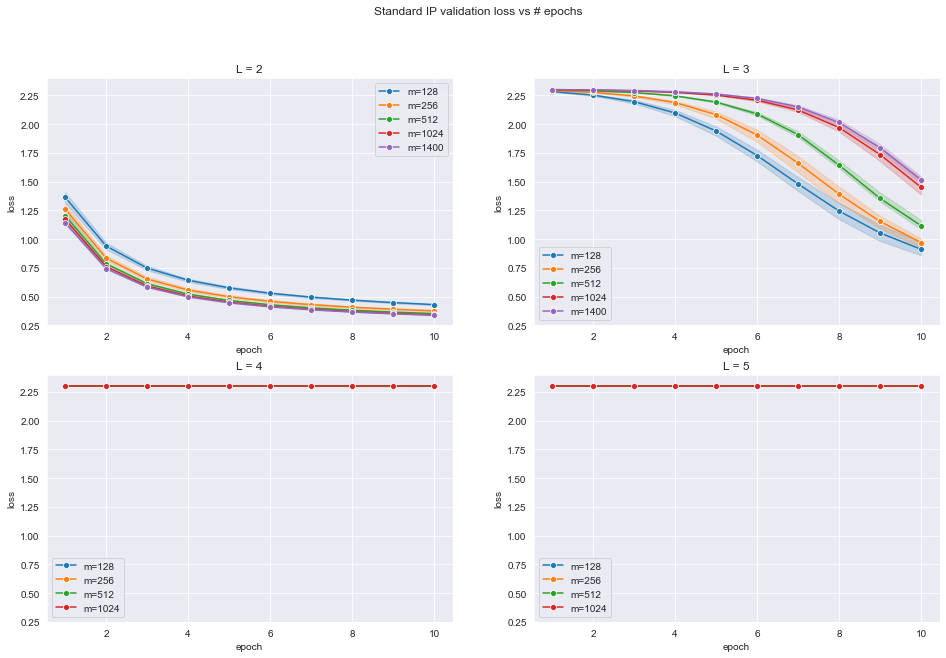

In [17]:
fig_name = 'standard_ip_{}_{}_{}.png'.format(activation, mode, metric)
fig_path = os.path.join(FIGURES_DIR, fig_name)
plot_metric_vs_time_std_L(fig_path=fig_path, results=epoch_res_dict[activation], metric=metric, time='epoch',
                          mode=mode, marker='o', y_min=0.25, y_max=2.4, figsize=(16,10))

In [1]:
#%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

In [17]:
#plt.ion()
fig = plt.figure(figsize=(12, 6))
x = 2

<Figure size 864x432 with 0 Axes>

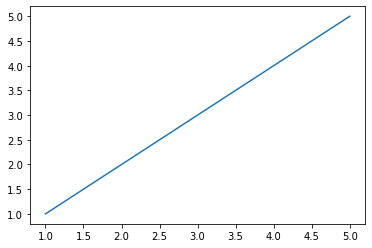

In [18]:
plt.plot([1, 2, 3, 4, 5], np.array([1, 2, 3, 4, 5]), label=i)
fig.canvas.draw()
x = 4

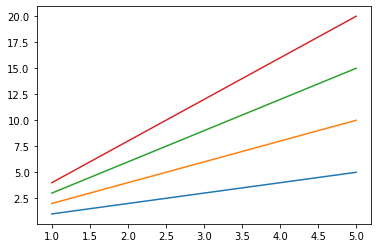

In [13]:
for i in range(1, 5):
    #ax = plt.gca()
    plt.plot([1, 2, 3, 4, 5], i * np.array([1, 2, 3, 4, 5]), label=i)
    #fig.canvas.draw_idle()
    fig.canvas.draw()
    plt.clf()
    #plt.pause(0.2) 
#plt.legend()
#plt.show()
x = 3

In [5]:
fig.canvas.draw()

In [6]:
[p.remove() for p in reversed(ax.patches)]

[]

In [7]:
fig.canvas.draw()